# Assignment # 01: Data Preprocessing and Visualization

**Syed Jawad Bukhari 207414 BESE 8B**

# CS471: Machine Learning
### BESE-8 AB
### Instructors: Prof. Dr. Faisal Shafait, Dr. Muhammad Muneeb Ullah
#### Due Date: March 18, 2020

### Introduction

The Novel Coronavirus (COVID19) which causes respiratory illnesss was first detected in Wuhan, China. Since the disease is contagious, it has spread all over the world due to the high number of tourism and business visits to / from China. As you all are very well aware, COVID19 has been labelled as a global pandemic now by World Health Organization. Countries such as Italy, China, Qatar, USA, Saudi Arabia, etc, have cancelled most of the flights and a lockdown notice has been issued in Italy to avoid further wide-spread of the virus. 
Scientists all over the world are trying to drive insights from the datasets to come up with a possible prediction which will help with early diagnosis of COVID-19, estimating the spread, and the virus frequency and duration. 
Johns Hopkins University has made an excellent dashboard using the affected cases data. The dataset is made available at Kaggle and can be downloaded for the purpose of research.
For this assignment, we will use the Kaggle COVID-19 dataset (Download here: <a href="https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset" title="DATASET">DATASET</a>) and will try to learn some insights using the power of Machine Learning.
The Johns Hopkins University's web based dashboard can be accessed here:
<a href="https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6" title="Web Dashboard">Web Dashboard</a>

#### Question # 01

As you must have noticed, there are 6 files in the data you have downloaded from Kaggle.
For this question, we will use the main file `covid_19_data.csv`.
The steps to follow are given:
1. Read the data file and examine the features
2. Since the dataset is a bit sparse, clean the dataset by dropping rows which have missing points.
3. Print the initial 10 rows of the data.

**1.**

In [0]:
import pandas as pd
import numpy as np

In [74]:
covid_data=pd.read_csv('covid_19_data.csv')
covid_data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


**2.**

In [75]:
covid_data.shape

(5890, 8)

In [76]:
covid_data[covid_data['Province/State'].isnull()==True].shape   #null values 

(2315, 8)

**3**

In [0]:
covid_data=covid_data.dropna()         #drop null values
#covid_data

In [0]:
#drop past data

covid_data=covid_data.drop_duplicates(subset='Province/State', keep="last")


In [79]:
covid_data.head(10)         #first 10 values  

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
118,119,01/24/2020,Chicago,US,1/24/20 17:00,1.0,0.0,0.0
471,472,01/31/2020,Bavaria,Germany,1/31/2020 23:59,5.0,0.0,0.0
1005,1006,02/08/2020,Cruise Ship,Others,2020-02-07T16:33:03,61.0,0.0,0.0
1985,1986,02/21/2020,"Ashland, NE",US,2020-02-21T23:23:06,11.0,0.0,0.0
1991,1992,02/21/2020,"Travis, CA",US,2020-02-21T23:23:06,5.0,0.0,0.0
2002,2003,02/21/2020,"Lackland, TX",US,2020-02-21T23:23:06,2.0,0.0,0.0
2344,2345,02/25/2020,None,Austria,2020-02-25T18:55:32,2.0,0.0,0.0
2878,2879,03/01/2020,"Seattle, WA",US,2020-03-01T21:13:12,9.0,1.0,1.0
2899,2900,03/01/2020,"Chicago, IL",US,2020-03-01T03:53:02,3.0,0.0,2.0
3036,3037,03/02/2020,"Portland, OR",US,2020-03-02T03:33:08,2.0,0.0,0.0


#### Question # 02

1. Rank the countries in the dataset in descending order according to the number of deaths.
2. Figure out the most affected provinces/states in top 3 countries with most number of Deaths.
3. Repeat the first two steps for Recovered and Confirmed cases as well.
4. Plot a bar graph for top 10 states in China and US in accordance to the death cases, and recovered cases.

**1**

In [80]:
#reverse sorting summation by  number of death groub by countries

covid_data.groupby(['Country/Region'])['Deaths'].sum().sort_values(ascending=False).head(30)

Country/Region
Mainland China    3199.0
France              91.0
US                  86.0
UK                  29.0
Hong Kong            4.0
Australia            3.0
Denmark              2.0
Taiwan               1.0
Canada               1.0
Others               0.0
Macau                0.0
Germany              0.0
Austria              0.0
Name: Deaths, dtype: float64

**2**

In [81]:
#max of death cities in top 3 countries

#top 3 countries from the list : top3
deathgroups=covid_data.groupby('Country/Region')['Deaths'].sum().sort_values(ascending=False)
top3=deathgroups.keys()[:3] 


#max value of each column from top3 : max3
max3=covid_data[(covid_data['Country/Region'].isin(top3))].groupby(['Country/Region']).max()

max3

,SNo,ObservationDate,Province/State,Last Update,Confirmed,Deaths,Recovered
Country/Region,,,,,,,
France,5866,03/15/2020,St Martin,2020-03-15T18:20:19,4499.0,91.0,12.0
Mainland China,5858,03/15/2020,Zhejiang,2020-03-15T18:20:18,67794.0,3085.0,54288.0
US,5889,03/15/2020,"Yolo County, CA",2020-03-15T18:33:03,732.0,40.0,6.0


In [82]:
#for max 3 Deaths

covid_data[(covid_data['Deaths']==91) & (covid_data['Country/Region']=='France')
          |
          (covid_data['Deaths']==3085) & (covid_data['Country/Region']=='Mainland China')
          |
          (covid_data['Deaths']==40) & (covid_data['Country/Region']=='US')]['Province/State']


5632         Hubei
5638        France
5657    Washington
Name: Province/State, dtype: object

**3**

In [83]:
#for max3 recovered

covid_data[(covid_data['Recovered']==12) & (covid_data['Country/Region']=='France')
          |
          (covid_data['Recovered']==54288) & (covid_data['Country/Region']=='Mainland China')
          |
          (covid_data['Recovered']==6) & (covid_data['Country/Region']=='US')]['Province/State']


5632         Hubei
5638        France
5664    California
Name: Province/State, dtype: object

In [84]:
#for max3 Cofirmed

covid_data[(covid_data['Confirmed']==4499) & (covid_data['Country/Region']=='France')
          |
          (covid_data['Confirmed']==67794) & (covid_data['Country/Region']=='Mainland China')
          |
          (covid_data['Confirmed']==732) & (covid_data['Country/Region']=='US')]['Province/State']


5632       Hubei
5638      France
5655    New York
Name: Province/State, dtype: object

**4**

In [0]:
covid_data_china=covid_data[covid_data['Country/Region']=='Mainland China']

covid_data_china_top10=covid_data_china.nlargest(10,'Deaths')


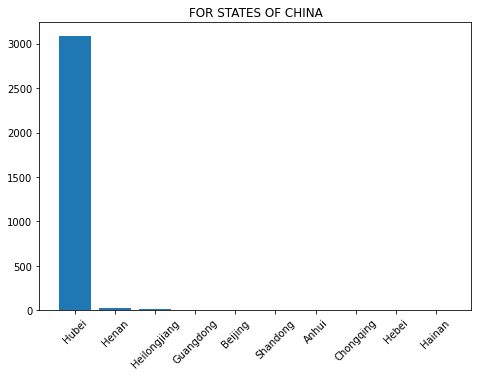

In [86]:
import matplotlib.pyplot as plt




fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
states = covid_data_china_top10['Province/State']
deaths = covid_data_china_top10['Deaths']
ax.bar(states,deaths)

plt.title("FOR STATES OF CHINA")
plt.xticks(rotation=45)
plt.show()

In [87]:
#for america

covid_data_US=covid_data[covid_data['Country/Region']=='US']

covid_data_US_top10=covid_data_US.nlargest(10,'Deaths')

covid_data_US_top10

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
5657,5658,03/15/2020,Washington,US,2020-03-15T02:13:21,643.0,40.0,1.0
4294,4295,03/09/2020,"King County, WA",US,2020-03-08T20:23:09,83.0,17.0,1.0
5664,5665,03/15/2020,California,US,2020-03-15T18:33:03,426.0,6.0,6.0
5697,5698,03/15/2020,Florida,US,2020-03-15T18:20:19,115.0,4.0,0.0
5655,5656,03/15/2020,New York,US,2020-03-15T18:20:19,732.0,3.0,0.0
5710,5711,03/15/2020,Louisiana,US,2020-03-15T18:20:19,91.0,2.0,0.0
5715,5716,03/15/2020,New Jersey,US,2020-03-15T18:20:19,98.0,2.0,0.0
2878,2879,03/01/2020,"Seattle, WA",US,2020-03-01T21:13:12,9.0,1.0,1.0
4316,4317,03/09/2020,"Snohomish County, WA",US,2020-03-08T21:43:03,31.0,1.0,0.0
4360,4361,03/09/2020,"Placer County, CA",US,2020-03-09T08:23:03,7.0,1.0,0.0


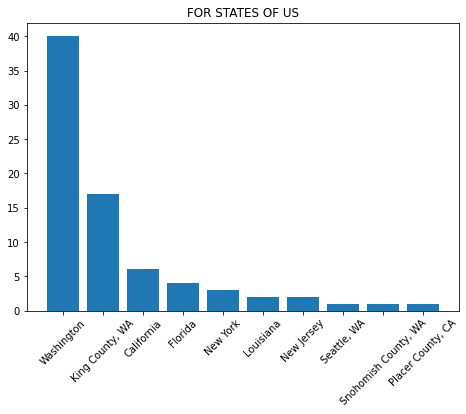

In [88]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
states = covid_data_US_top10['Province/State']
deaths = covid_data_US_top10['Deaths']
ax.bar(states,deaths)

plt.title("FOR STATES OF US")
plt.xticks(rotation=45)
plt.show()

#### Question # 03

Since we have dates in the data, let's quantify out how the virus has spread over time and which areas are most affected by the virus. This will help us figure out if the situation is getting any better over time or not.

1. Plot the confirmed, deaths and recovered cases as line graphs with dates for US, Iran and China each.
2. Looking at the plots, explain which country has seen a surge in confirmed, and death cases?
3. Work out the death rate due to COVID-19 in these three countries.
4. By examining the plots, which country has been able to efficiently and swiftly recover the confirmed cases? Work out the recovery rate for each country (US, Iran and China) and then answer the question?

**1**

In [89]:
#read dataset again
covid_data_new=pd.read_csv('covid_19_data.csv')
covid_data_new.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [90]:
covid_data_new.shape

(5890, 8)

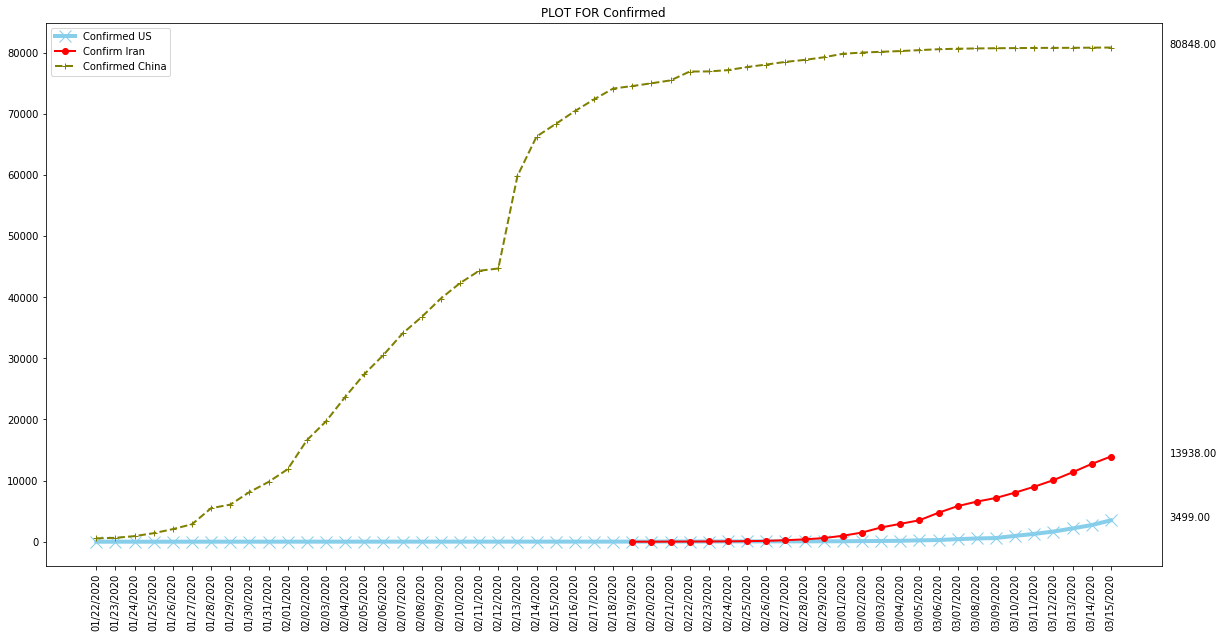

In [91]:
covid_data_US=covid_data_new[covid_data_new['Country/Region']=='US']
covid_data_china=covid_data_new[covid_data_new['Country/Region']=='Mainland China']
covid_data_iran=covid_data_new[covid_data_new['Country/Region']=='Iran']



covid_confirmed_us=covid_data_US.groupby('ObservationDate')['Confirmed'].sum()
covid_confirmed_iran=covid_data_iran.groupby('ObservationDate')['Confirmed'].sum()
covid_confirmed_china=covid_data_china.groupby('ObservationDate')['Confirmed'].sum()




covid_deaths_iran=covid_data_iran.groupby('ObservationDate')['Deaths'].sum()
covid_deaths_us=covid_data_US.groupby('ObservationDate')['Deaths'].sum()
covid_deaths_china=covid_data_china.groupby('ObservationDate')['Deaths'].sum()




covid_recovered_us=covid_data_US.groupby('ObservationDate')['Recovered'].sum()
covid_recovered_iran=covid_data_iran.groupby('ObservationDate')['Recovered'].sum()
covid_recovered_china=covid_data_china.groupby('ObservationDate')['Recovered'].sum()



# multiple line plot
plt.figure(figsize=(20,10))
plt.title('PLOT FOR Confirmed')
plt.plot( covid_confirmed_us.keys() , covid_confirmed_us.values, marker='x', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4,  label="Confirmed US")
plt.plot( covid_confirmed_iran.keys(), covid_confirmed_iran.values, marker='o', color='red', linewidth=2, label="Confirm Iran")
plt.plot( covid_confirmed_china.keys(), covid_confirmed_china.values,  marker='+', color='olive', linewidth=2, linestyle='dashed', label="Confirmed China")
plt.xticks(rotation=90)
plt.legend()

for var in (covid_confirmed_us.values, covid_confirmed_iran.values,covid_confirmed_china.values):
    plt.annotate('%0.2f' % var.max(), xy=(1, var.max()), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')



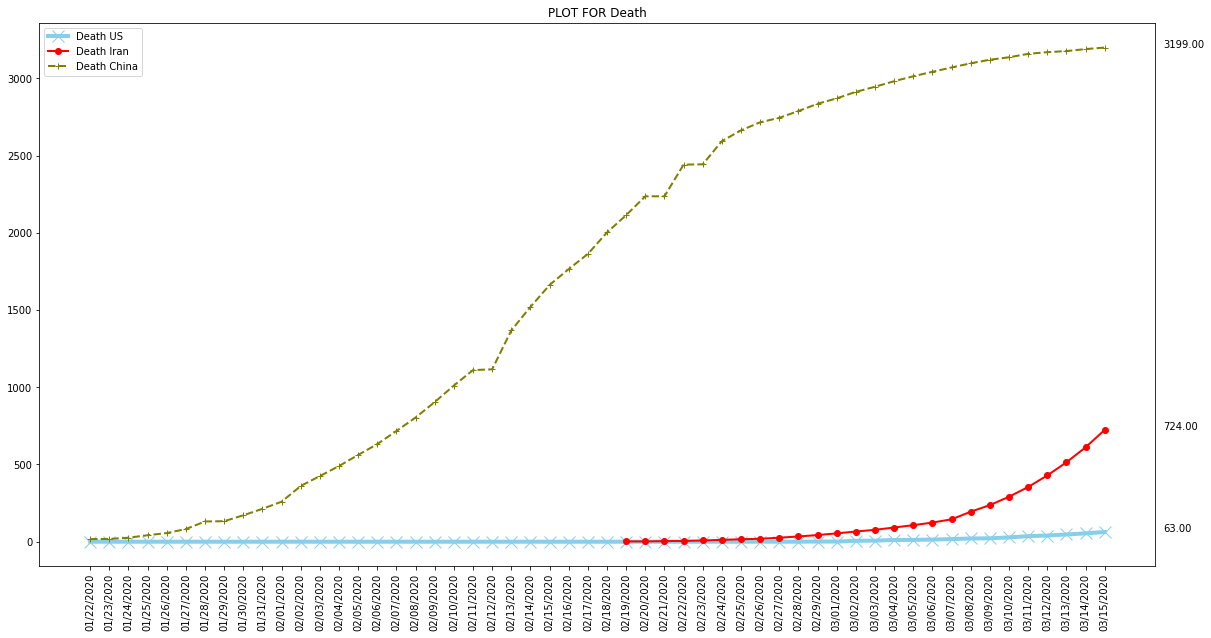

In [92]:


# multiple line plot
plt.figure(figsize=(20,10))
plt.title('PLOT FOR Death')
plt.plot( covid_deaths_us.keys() , covid_deaths_us.values, marker='x', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4,  label="Death US")
plt.plot( covid_deaths_iran.keys(), covid_deaths_iran.values, marker='o', color='red', linewidth=2, label="Death Iran")
plt.plot( covid_deaths_china.keys(), covid_deaths_china.values,  marker='+', color='olive', linewidth=2, linestyle='dashed', label="Death China")
plt.xticks(rotation=90)
plt.legend()

for var in (covid_deaths_iran.values, covid_deaths_us.values,covid_deaths_china.values):
    plt.annotate('%0.2f' % var.max(), xy=(1, var.max()), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')



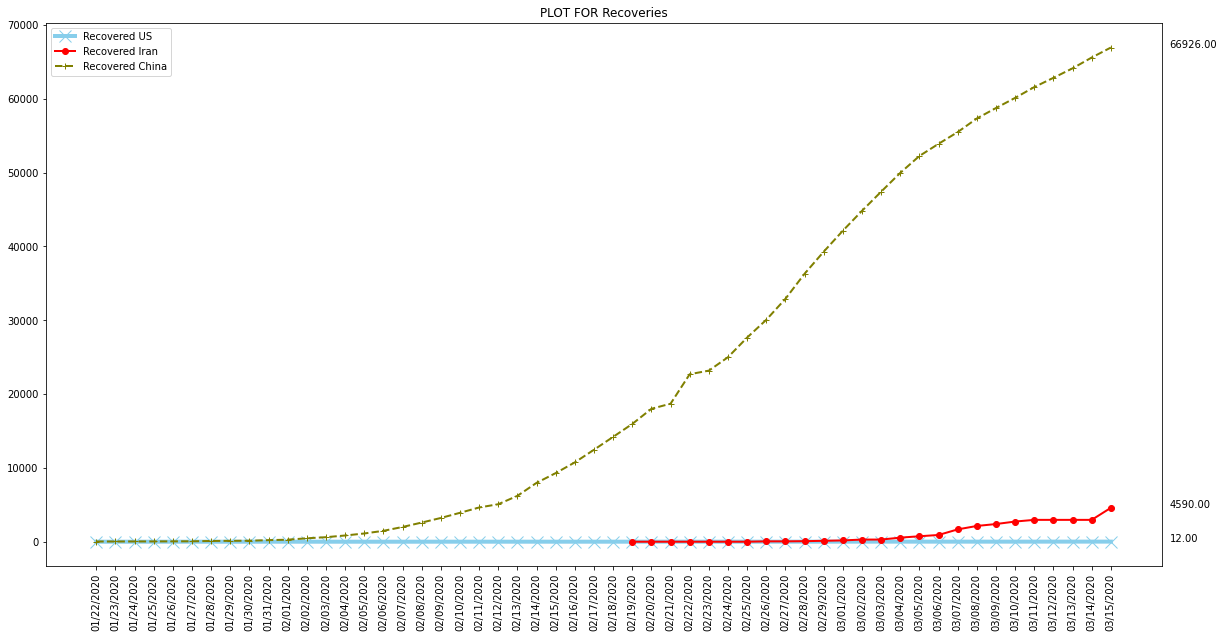

In [93]:



# multiple line plot
plt.figure(figsize=(20,10))
plt.title('PLOT FOR Recoveries')
plt.plot( covid_recovered_us.keys() , covid_recovered_us.values, marker='x', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4,  label="Recovered US")
plt.plot( covid_recovered_iran.keys(), covid_recovered_iran.values, marker='o', color='red', linewidth=2, label="Recovered Iran")
plt.plot( covid_recovered_china.keys(), covid_recovered_china.values,  marker='+', color='olive', linewidth=2, linestyle='dashed', label="Recovered China")
plt.xticks(rotation=90)
plt.legend()

for var in (covid_recovered_us.values, covid_recovered_iran.values,covid_recovered_china.values):
    plt.annotate('%0.2f' % var.max(), xy=(1, var.max()), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')



## 2. Looking at the plots, explain which country has seen a surge in confirmed, and death cases?

### For confirmed: US has seen a sudden surge because the line of the grapgh was uniform and then sudden exponential increase

### For Death: Iran has suden surge in the death because of exponnetial growth n the end of its line 


**3**

In [94]:
#death rates

deathRateUs=(covid_deaths_us.max()/covid_confirmed_us.max())*100
deathRateUsIran=(covid_deaths_iran.max()/covid_confirmed_iran.max())*100
deathRateChina=(covid_deaths_china.max()/covid_confirmed_china.max())*100

print('US death rate: ',deathRateUs)
print('Iran death rate: ',deathRateUsIran)
print('China death rate: ',deathRateChina)

US death rate:  1.8005144326950557
Iran death rate:  5.194432486726933
China death rate:  3.9568078369285575


**4**

In [95]:
#recovery Rates

recoverRateUs=(covid_recovered_us.max()/covid_confirmed_us.max())*100
recoverRateIran=(covid_recovered_iran.max()/covid_confirmed_iran.max())*100
recoverRateChina=(covid_recovered_china.max()/covid_confirmed_china.max())*100


print('US Recovery rate: ',recoverRateUs)
print('Iran Recovery rate: ',recoverRateIran)
print('China Recovery rate: ',recoverRateChina)


US Recovery rate:  0.3429551300371535
Iran Recovery rate:  32.93155402496771
China Recovery rate:  82.78003166435781


#### Question # 04

In this question, we will look at another data file namely `time_series_covid_19_deaths.csv`.
In this file, time series data of death occurred due to COVID-19 in countries/states/provinces is given.

1. Read the file and examine the features.
2. Clean the dataset by dropping missing rows with data points.
3. Since you already have information for States/Provinces in US, and China with most deaths, you can use those States/Provinces and plot the number of deaths against each of the top 5 states in both China and US.

**1**

In [96]:
covid_deaths_data=pd.read_csv('time_series_covid_19_deaths.csv');
covid_deaths_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,NaN,Japan,36.0000,138.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,2,4,4,5,6,6,6,6,6,6,6,6,10,10,15,16,19,22
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [97]:
covid_data_US_top10           #top10 values wrt deaths

covid_data_US_top5=covid_data_US_top10.nlargest(5,'Deaths')
covid_data_US_top5             #top5

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
5657,5658,03/15/2020,Washington,US,2020-03-15T02:13:21,643.0,40.0,1.0
4294,4295,03/09/2020,"King County, WA",US,2020-03-08T20:23:09,83.0,17.0,1.0
5664,5665,03/15/2020,California,US,2020-03-15T18:33:03,426.0,6.0,6.0
5697,5698,03/15/2020,Florida,US,2020-03-15T18:20:19,115.0,4.0,0.0
5655,5656,03/15/2020,New York,US,2020-03-15T18:20:19,732.0,3.0,0.0


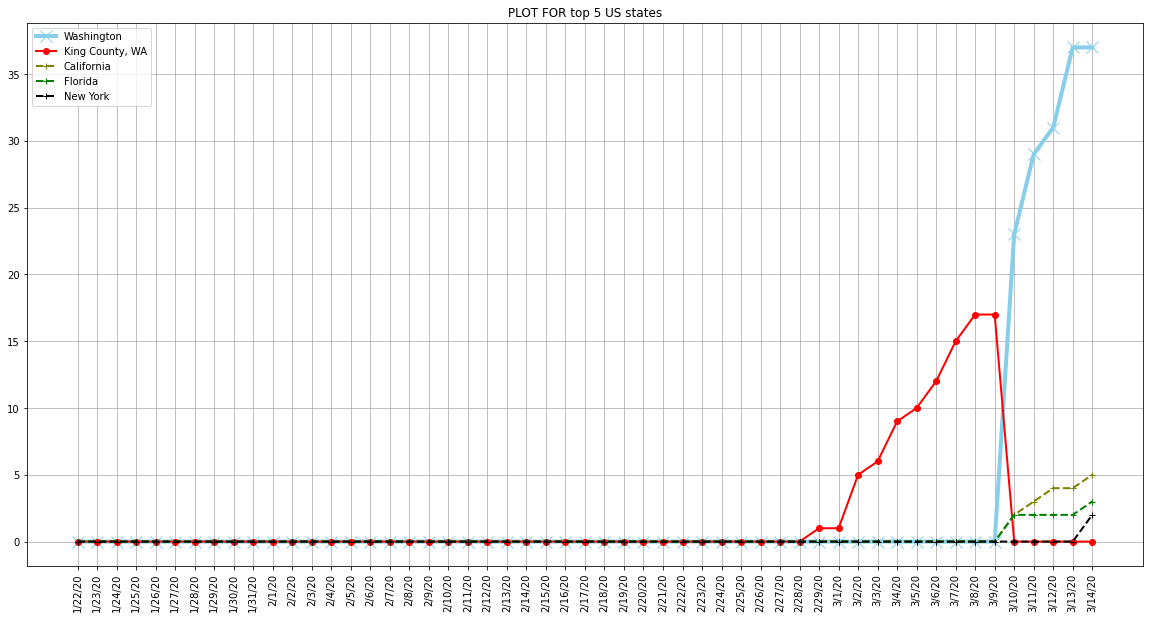

In [98]:
dates=covid_deaths_data.iloc[:,4:].columns


# multiple line plot
plt.figure(figsize=(20,10))
plt.title('PLOT FOR top 5 US states')
plt.plot(  dates , covid_deaths_data.loc[covid_deaths_data['Province/State']== covid_data_US_top5['Province/State'].values[0]].iloc[:,4:].T , marker='x', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4,  label="Washington")
plt.plot(   dates , covid_deaths_data.loc[covid_deaths_data['Province/State']== covid_data_US_top5['Province/State'].values[1]].iloc[:,4:].T , marker='o', color='red', linewidth=2, label="King County, WA")
plt.plot(   dates , covid_deaths_data.loc[covid_deaths_data['Province/State']== covid_data_US_top5['Province/State'].values[2]].iloc[:,4:].T ,  marker='+', color='olive', linewidth=2, linestyle='dashed', label="California")
plt.plot(   dates , covid_deaths_data.loc[covid_deaths_data['Province/State']== covid_data_US_top5['Province/State'].values[3]].iloc[:,4:].T ,  marker='+', color='green', linewidth=2, linestyle='dashed', label="Florida")
plt.plot(   dates , covid_deaths_data.loc[covid_deaths_data['Province/State']== covid_data_US_top5['Province/State'].values[4]].iloc[:,4:].T ,  marker='+', color='black', linewidth=2, linestyle='dashed', label="New York")

plt.grid(True)

plt.xticks(rotation=90)
plt.legend()



In [99]:
covid_data_china_top10           #top10 values wrt deaths

covid_data_china_top5=covid_data_china_top10.nlargest(5,'Deaths')
covid_data_china_top5             #top5


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
5632,5633,03/15/2020,Hubei,Mainland China,2020-03-15T18:20:18,67794.0,3085.0,54288.0
5641,5642,03/15/2020,Henan,Mainland China,2020-03-14T09:53:08,1273.0,22.0,1250.0
5661,5662,03/15/2020,Heilongjiang,Mainland China,2020-03-15T00:33:02,482.0,13.0,453.0
5640,5641,03/15/2020,Guangdong,Mainland China,2020-03-15T18:20:18,1360.0,8.0,1304.0
5662,5663,03/15/2020,Beijing,Mainland China,2020-03-15T01:13:10,442.0,8.0,353.0


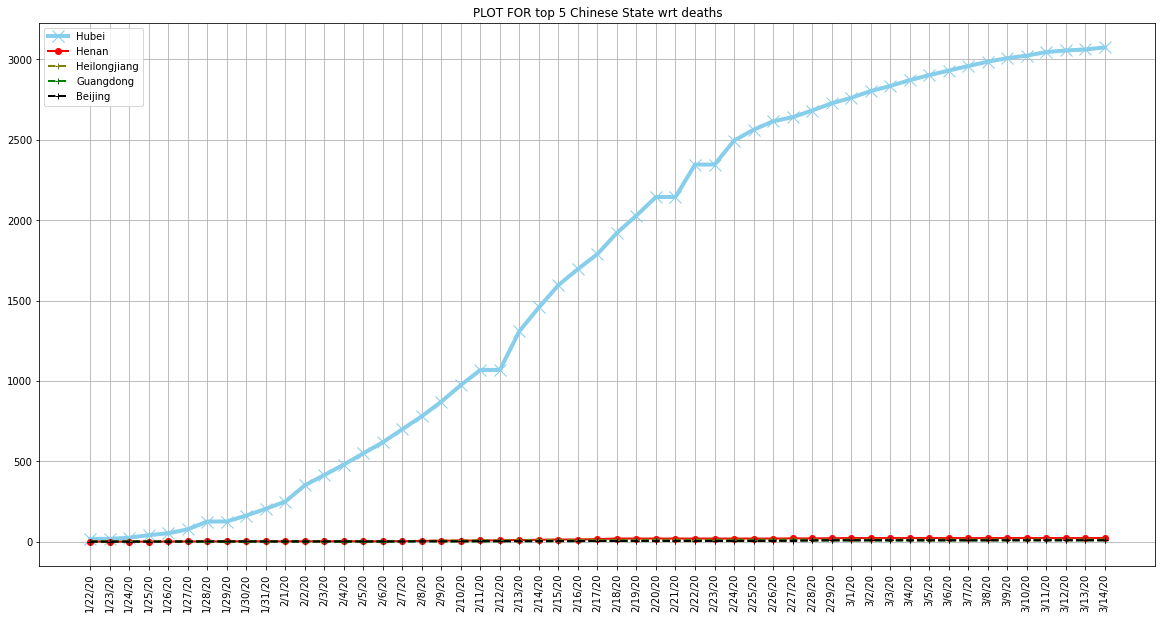

In [100]:

# multiple line plot
plt.figure(figsize=(20,10))
plt.title('PLOT FOR top 5 Chinese State wrt deaths')
plt.plot(  dates , covid_deaths_data.loc[covid_deaths_data['Province/State']== covid_data_china_top5['Province/State'].values[0]].iloc[:,4:].T , marker='x', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4,  label="Hubei")
plt.plot(   dates , covid_deaths_data.loc[covid_deaths_data['Province/State']== covid_data_china_top5['Province/State'].values[1]].iloc[:,4:].T , marker='o', color='red', linewidth=2, label="Henan")
plt.plot(   dates , covid_deaths_data.loc[covid_deaths_data['Province/State']== covid_data_china_top5['Province/State'].values[2]].iloc[:,4:].T ,  marker='+', color='olive', linewidth=2, linestyle='dashed', label="Heilongjiang")
plt.plot(   dates , covid_deaths_data.loc[covid_deaths_data['Province/State']== covid_data_china_top5['Province/State'].values[3]].iloc[:,4:].T ,  marker='+', color='green', linewidth=2, linestyle='dashed', label="Guangdong")
plt.plot(   dates , covid_deaths_data.loc[covid_deaths_data['Province/State']== covid_data_china_top5['Province/State'].values[4]].iloc[:,4:].T ,  marker='+', color='black', linewidth=2, linestyle='dashed', label="Beijing")

plt.grid(True)

plt.xticks(rotation=90)
plt.legend()



#### Question # 05

This aspect is interesting since we would get to work with Geographical Plots. You have the latitude and longitude data from the `time_series_covid_19_deaths.csv` data file. You will use that for this question.

We will use BaseMap library to plot the latitude and longitude points on the world map.
You can download BaseMap by running the following command in your terminal/command line prompt: 
```
pip3 install https://github.com/matplotlib/basemap/archive/v1.1.0.tar.gz
```

1. Once you have it installed, load up a basic world map and plot the values.
2. By visually examining, answer in which countries, the points scatter the most?

For reference and working directions with Basemap, you may take help from this video tutorial: <a href="https://www.youtube.com/watch?time_continue=114&v=XiZbrii49pI&feature=emb_title" BASEMAP >BASEMAP TUTORIAL</a>

In [0]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 25 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 0s (178 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 133872 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ...
Unpacking libgeos-dev (3.6.2-1build2) ...
Setting up libgeos-dev (3.6.2-1b

In [0]:
!pip install pyproj==1.9.6

     |████████████████████████████████| 2.8MB 2.8MB/s 
  Created wheel for pyproj: filename=pyproj-1.9.6-cp36-cp36m-linux_x86_64.whl size=3702142 sha256=cb289a7a998a18080d257f0e2919e695aa3ceb32c8bc1c883b1b7f0c801b4002
  Stored in directory: /root/.cache/pip/wheels/02/cd/b1/a2d6430f74c7a778a43d62f78bec109ca69c732dc9b929142a
Successfully built pyproj
  Found existing installation: pyproj 2.6.0
    Uninstalling pyproj-2.6.0:
      Successfully uninstalled pyproj-2.6.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/matplotlib/collections.py:886: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


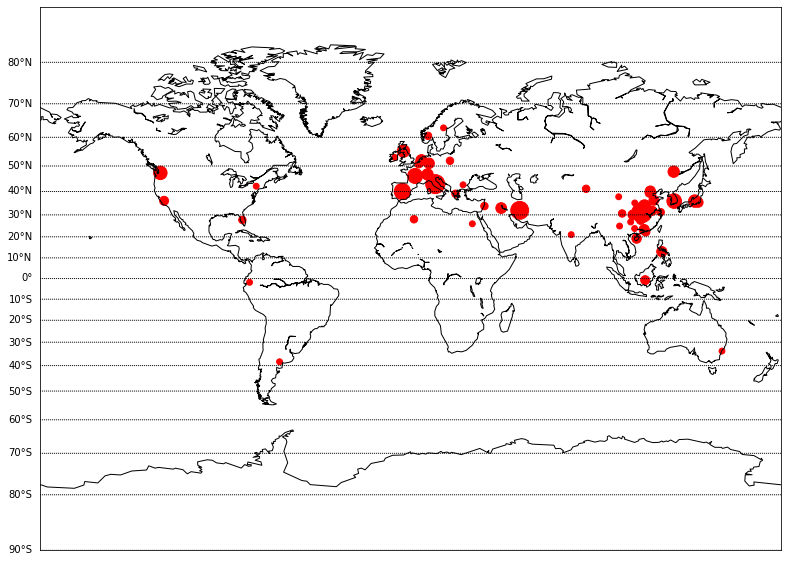

In [101]:
from mpl_toolkits.basemap import Basemap


# miller projection
m = Basemap(projection='mill',llcrnrlat=-90, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180, resolution='c')
plt.figure(figsize=(20,10))

# plot coastlines, draw label meridians and parallels.
m.drawcoastlines()
m.drawparallels(np.arange(-90,90,10),labels=[True, False, False, False])
m.drawmeridians(np.arange(-180,-180,30),labels=[0,0,0,1])

lon=covid_deaths_data.iloc[:,3:4].values
lat=covid_deaths_data.iloc[:,2:3].values
size=covid_deaths_data.iloc[:,-1:].values

m.scatter(lon,lat,latlon=True, s=np.log(size)*50, c='red',marker='o')

plt.show()

In [0]:
#### By visually examining, answer in which countries, the points scatter the most?


#### China

#### Question # 06

For this question, we will use the `COVID19_open_line_list.csv` file. 

1. Read the data file and examine the features
2. We will be working with these feature columns: `age, sex, symptoms, city, province, lives_in_Wuhan, and travel_history_location`.
3. Since these are textual values, you need to encode them to integers (maintain an encoding dictionary as well).
    * For example in `symptoms` column, you might assign fever -> 1, pneumonia -> 2, headache -> 3, etc.
    * There are several multiple symptoms as well for a single row, for those you can just sum the assigned integers. For example a row might list these symptons: fever, headache, since fever -> 1 and headache -> 3, you can replace fever, headache with 1+3 = 4 and so on. Start the integer encoding from 1 so that when summing the numbers, you donot get the same number back (e.g. 0+3 = 3).
    * You can do the same for other columns, just to avoid ambiguity, you can encode each column differently. 
    * For example, for the `symptoms` column, you starting assigning numbers from 1, let's say there were 4 symptoms, so the numbers would range from 1 - 4. For the next column, you can use numbers from 5 and so on. You are free to encode as you want. 
    * For ease, you can also use sklearn's LabelEncoder.
4. Once you have integer coded the entire dataset (7 columns), you can compute the correlation between city (let city column be `y` for this case) and every other column.
5. Pick the most 2 correlated fields (using the absolute value of correlations) and make `X`.
6. Use MinMaxScaler to scale X. Note that this will output a `np.array`. Make it a DataFrame again and rename the columns appropriately.
7. Print the head (5 rows) and tail (5 rows) of this dataframe.

In [103]:
covid_open_list=pd.read_csv('COVID19_open_line_list.csv')

columns=['age', 'sex', 'symptoms', 'city', 'province', 'lives_in_Wuhan','travel_history_location']
covid_open_list=covid_open_list.filter(columns)

covid_open_list.head()

,age,sex,symptoms,city,province,lives_in_Wuhan,travel_history_location
0,30,male,NaN,"Chaohu City, Hefei City",Anhui,yes,Wuhan
1,47,male,NaN,"Baohe District, Hefei City",Anhui,no,"Luzhou Hunan, via Wuhan"
2,49,male,NaN,"High-Tech Zone, Hefei City",Anhui,no,"Yinzhou Hunan, via Wuhan"
3,47,female,NaN,"High-Tech Zone, Hefei City",Anhui,no,NaN
4,50,female,NaN,"Feidong County, Hefei City",Anhui,no,Wuhan


In [104]:
covid_open_list.city.unique()

array(['Chaohu City, Hefei City', 'Baohe District, Hefei City',
       'High-Tech Zone, Hefei City', 'Feidong County, Hefei City',
       "Lu'an City", 'Fuyang City', 'Huaibei City', 'Huainan City',
       'Hefei City', 'Anqing City', 'Chizhou City', 'Bengbu City',
       'Changping District', 'Daxing District', 'Fengtai District',
       'Haidian District', 'Shijingshan District', 'Tongzhou District',
       'Xicheng District', nan, 'Chaoyang District', 'Changshou District',
       'Wanzhou District', 'Wushan County', 'Fuling District',
       'Yongchuan District', 'Dadukou District', 'Jiulongpo District',
       'Yubei District', 'Kaizhou District', 'Zhongxian County',
       'Yunyang County', 'Fengjie County', 'Wuxi County',
       'Xiushan County', 'Liangjiang New District', 'Dianjiang County',
       'Fuzhou City', 'Ningde City', 'Quanzhou City', 'Xiamen City',
       'Lanzhou City', 'Baiyin City', 'Foshan City', 'Guangzhou City',
       'Shaoguan City', 'Shenzhen City', 'Zhanjian

In [0]:
from sklearn.preprocessing import LabelEncoder

covid_open_list = covid_open_list.fillna('NA')
enclist = list()

for col in list(covid_open_list.columns):
  le = preprocessing.LabelEncoder()
  le.fit(covid_open_list[col])
  covid_open_list[col] = le.transform(covid_open_list[col])
  enclist.append(le)

In [106]:
for col in list(covid_open_list.columns):
  print('Absolute value of correlatioin between city and', col, abs(covid_open_list['city'].corr(covid_open_list[col])))

Absolute value of correlatioin between city and age 0.06010611985495587
Absolute value of correlatioin between city and sex 0.08383836348201464
Absolute value of correlatioin between city and symptoms 0.047428758803770614
Absolute value of correlatioin between city and city 1.0
Absolute value of correlatioin between city and province 0.14296158283723115
Absolute value of correlatioin between city and lives_in_Wuhan 0.05541514153675362
Absolute value of correlatioin between city and travel_history_location 0.01997107127656418


In [107]:
covid_open_list.corr()

,age,sex,symptoms,city,province,lives_in_Wuhan,travel_history_location
age,1.000000,-0.741257,-0.420462,0.060106,-0.011341,-0.405191,-0.256712
sex,-0.741257,1.000000,0.483601,-0.083838,0.022234,0.453334,0.264579
symptoms,-0.420462,0.483601,1.000000,-0.047429,0.011460,0.358518,0.210328
city,0.060106,-0.083838,-0.047429,1.000000,0.142962,-0.055415,-0.019971
province,-0.011341,0.022234,0.011460,0.142962,1.000000,0.015961,0.027648
lives_in_Wuhan,-0.405191,0.453334,0.358518,-0.055415,0.015961,1.000000,0.411611
travel_history_location,-0.256712,0.264579,0.210328,-0.019971,0.027648,0.411611,1.000000


In [108]:
#sex and age has most correlated value = 0.74 so:

X =covid_open_list.filter(['age','sex'])
X

,age,sex
0,39,5
1,62,5
2,64,5
3,62,4
4,66,4
...,...,...
14121,116,3
14122,116,3
14123,116,3
14124,116,3


In [109]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
sc.fit(X)
X = pd.DataFrame(sc.transform(X))
X.columns = [ 'age', 'sex']
X

,age,sex
0,0.336207,1.0
1,0.534483,1.0
2,0.551724,1.0
3,0.534483,0.8
4,0.568966,0.8
...,...,...
14121,1.000000,0.6
14122,1.000000,0.6
14123,1.000000,0.6
14124,1.000000,0.6


In [110]:
X.head()

,age,sex
0,0.336207,1.0
1,0.534483,1.0
2,0.551724,1.0
3,0.534483,0.8
4,0.568966,0.8


In [111]:
X.tail()

,age,sex
14121,1.0,0.6
14122,1.0,0.6
14123,1.0,0.6
14124,1.0,0.6
14125,1.0,0.6
